# Coherence (philosophical gambling strategy)

https://en.wikipedia.org/wiki/Coherence_(philosophical_gambling_strategy)

[*********************100%***********************]  1 of 1 completed


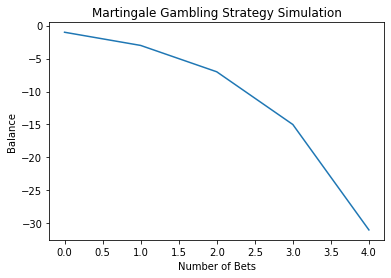

In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

def martingale_gambling(data, initial_bet=1, max_rounds=100, max_loss_streak=5):
    balance = 0
    bet = initial_bet
    results = []
    loss_streak = 0
    
    for price in data:
        if loss_streak >= max_loss_streak:
            break
        
        # Simulate a bet
        if np.random.rand() < 0.5:  # Assuming a 50/50 win/loss scenario
            balance += bet
            bet = initial_bet
            loss_streak = 0
        else:
            balance -= bet
            bet *= 2
            loss_streak += 1
        
        results.append(balance)
        
        if len(results) >= max_rounds:
            break

    return results

# Simulate gambling using the Martingale system
gambling_results = martingale_gambling(data)

# Plot the results
plt.plot(gambling_results)
plt.xlabel('Number of Bets')
plt.ylabel('Balance')
plt.title('Martingale Gambling Strategy Simulation')
plt.show()

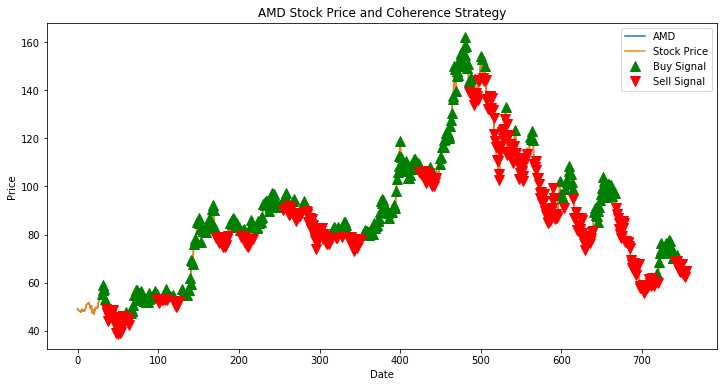

In [2]:
# Define Coherence function
def coherence_strategy(data, window_size=30, threshold=0.01):
    """
    Coherence strategy based on rolling average.

    Parameters:
        data (numpy.ndarray): Array of historical stock prices.
        window_size (int): Rolling window size for averaging.
        threshold (float): Threshold for betting (above or below average).

    Returns:
        bets (numpy.ndarray): Array of bets (1 for buy, -1 for sell, 0 for hold).
    """
    rolling_mean = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    bets = np.zeros(len(data))
    for i in range(window_size, len(data)):
        if data[i] > (1 + threshold) * rolling_mean[i - window_size]:
            bets[i] = 1  # Buy signal
        elif data[i] < (1 - threshold) * rolling_mean[i - window_size]:
            bets[i] = -1  # Sell signal
        else:
            bets[i] = 0  # Hold signal
    return bets

# Apply Coherence strategy
bets = coherence_strategy(data)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label=symbol)
plt.title(f'{symbol} Stock Price and Coherence Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(data, label='Stock Price')
plt.plot(np.where(bets == 1, data, np.nan), '^', markersize=10, color='g', label='Buy Signal')
plt.plot(np.where(bets == -1, data, np.nan), 'v', markersize=10, color='r', label='Sell Signal')
plt.legend()
plt.show()

In [5]:
# Create a DataFrame with buy and sell labels
bets_df = pd.DataFrame({'Price': data, 'Signal': bets})
bets_df['Signal'] = bets_df['Signal'].map({-1: 'Sell', 0: 'Hold', 1: 'Buy'})

# Print the DataFrame
print(bets_df)

         Price Signal
0    49.099998   Hold
1    48.599998   Hold
2    48.389999   Hold
3    48.250000   Hold
4    47.830002   Hold
..         ...    ...
751  64.519997   Sell
752  63.270000   Sell
753  62.570000   Sell
754  64.820000   Sell
755  64.769997   Sell

[756 rows x 2 columns]
